In [1]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a,b,c = input("Введите a: "), input("Введите b: "), input("Введите c: ")
n_a, n_b, n_c = float(a), int(b), int(c)
print(f"Значения a, b, c: {a}, {b}, {c}")

Введите a: 1.75
Введите b: 8
Введите c: 7
Значения a, b, c: 1.75, 8, 7


# Вариант 24

Задание 5. Линейное программирование. Графический метод [1,2 – гл. 3, 4]
Решить задачу линейного программирования, используя геометрическую интерпретацию.
Проверить результаты вычислений на компьютере.

In [3]:
price = [n_a, 1]

matrix = [[-1, -(n_b-3)], [-(n_c-4), -1], [-3, -2]] 

stocks = [-n_b, -n_c, -11]  

x1_bounds = (0, None)
x2_bounds = (0, None)

m = linprog(c=price, A_ub=matrix, b_ub=stocks, bounds=[x1_bounds, x2_bounds], method= "revised simplex")
m

     con: array([], dtype=float64)
     fun: 5.75
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.3000000e+01, 8.8817842e-16, 0.0000000e+00])
  status: 0
 success: True
       x: array([1., 4.])

Оптимальный план

In [4]:
m.x

array([1., 4.])

Оптимальное значение целевой функции

In [5]:
m.fun

5.75

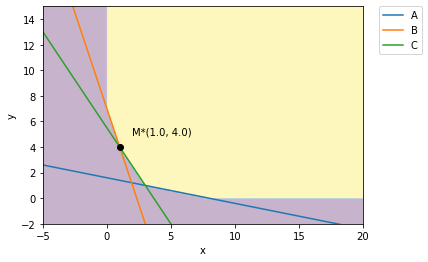

In [6]:
d = np.linspace(-20,20,300)
x,y = np.meshgrid(d,d)

plt.imshow( (((n_b-3)*y>=n_b-x) & (y>=n_c-(n_c-4)*x) & (2*y>=11-3*x) & (y>=0) & (x>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap='viridis', alpha = 0.3);

x = np.linspace(-20, 20, 2000)

# (n_b-3)*y1 >= n_b-x)
# (y2 >= n_c-(n_c-4)*x)
# 2*y3 >= 11-3*x

y1 = (n_b-x)/(n_b-3)
y2 = n_c-(n_c-4)*x
y3 = (11-3*x)/2.0

# Рисуем линии
plt.plot(x, y1, label=r'A')
plt.plot(x, y2, label=r'B')
plt.plot(x, y3, label=r'C')

#Шкала
plt.xlim(-5,20)
plt.ylim(-2,15)

#Точка - оптимальный план
plt.plot(m.x[0], m.x[1], 'ko')
plt.text(m.x[0] + 1, m.x[1] + 1, f'M*({m.x[0].round(3)}, {m.x[1].round(3)})')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'x')
plt.ylabel(r'y')

plt.show()